## Anomaly Detection Tutorial

## What Are Anomalies?

Anomalies can be broadly categorized as:

Point anomalies: A single instance of data is anomalous if it's too far off from the rest. Business use case: Detecting credit card fraud based on "amount spent."

Contextual anomalies: The abnormality is context specific. This type of anomaly is common in time-series data. Business use case: Spending $100 on food every day during the holiday season is normal, but may be odd otherwise.

Collective anomalies: A set of data instances collectively helps in detecting anomalies. Business use case: Someone is trying to copy data form a remote machine to a local host unexpectedly, an anomaly that would be flagged as a potential cyber attack.

Anomaly detection is similar to — but not entirely the same as — noise removal and novelty detection.

Novelty detection is concerned with identifying an unobserved pattern in new observations not included in training data like a sudden interest in a new channel on YouTube during Christmas, for instance.

Noise removal (NR) is the process of removing noise from an otherwise meaningful signal.

1. Anomaly Detection Techniques

### Simple Statistical Methods

The simplest approach to identifying irregularities in data is to flag the data points that deviate from common statistical properties of a distribution, including mean, median, mode, and quantiles. Let's say the definition of an anomalous data point is one that deviates by a certain standard deviation from the mean. Traversing mean over time-series data isn't exactly trivial, as it's not static. You would need a rolling window to compute the average across the data points. Technically, this is called a rolling average or a moving average, and it's intended to smooth short-term fluctuations and highlight long-term ones. Mathematically, an n-period simple moving average can also be defined as a "low pass filter."

### Challenges with Simple Statistical Methods
The low pass filter allows you to identify anomalies in simple use cases, but there are certain situations where this technique won't work. Here are a few:

The data contains noise which might be similar to abnormal behavior, because the boundary between normal and abnormal behavior is often not precise.

The definition of abnormal or normal may frequently change, as malicious adversaries constantly adapt themselves. Therefore, the threshold based on moving average may not always apply.

The pattern is based on seasonality. This involves more sophisticated methods, such as decomposing the data into multiple trends in order to identify the change in seasonality.

2. Machine Learning-Based Approaches
Below is a brief overview of popular machine learning-based techniques for anomaly detection.

* a) Density-Based Anomaly Detection
Density-based anomaly detection is based on the k-nearest neighbors algorithm.

  (Assumption: Normal data points occur around a dense neighborhood and abnormalities are far away.)

The nearest set of data points are evaluated using a score, which could be Eucledian distance or a similar measure dependent on the type of the data (categorical or numerical). They could be broadly classified into two algorithms:

K-nearest neighbor: k-NN is a simple, non-parametric lazy learning technique used to classify data based on similarities in distance metrics such as Eucledian, Manhattan, Minkowski, or Hamming distance.

Relative density of data: This is better known as local outlier factor (LOF). This concept is based on a distance metric called reachability distance.

* b) Clustering-Based Anomaly Detection

Clustering is one of the most popular concepts in the domain of unsupervised learning.

Assumption: Data points that are similar tend to belong to similar groups or clusters, as determined by their distance from local centroids.

K-means is a widely used clustering algorithm. It creates 'k' similar clusters of data points. Data instances that fall outside of these groups could potentially be marked as anomalies.

* c) Support Vector Machine-Based Anomaly Detection

### Support vector machine is another effective technique for detecting anomalies.
A SVM is typically associated with supervised learning, but there are extensions (OneClassCVM, for instance) that can be used to identify anomalies as an unsupervised problems (in which training data are not labeled).
The algorithm learns a soft boundary in order to cluster the normal data instances using the training set, and then, using the testing instance, it tunes itself to identify the abnormalities that fall outside the learned region.
Depending on the use case, the output of an anomaly detector could be numeric scalar values for filtering on domain-specific thresholds or textual labels (such as binary/multi labels).
In this jupyter notebook we are going to take the credit card fraud detection as the case study for understanding this concept in detail using the following Anomaly Detection Techniques namely

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


## Which type of Anomaly Detection?

Typically the anomalous items will translate to some kind of problem such as bank fraud, a structural defect, medical problems or errors in a text. There are three broad categories of anomaly detection techniques exist:

- **Unsupervised anomaly detection:** Unsupervised anomaly detection techniques detect anomalies in an unlabeled test data set under the assumption that the majority of the instances in the data set are normal by looking for instances that seem to fit least to the remainder of the data set. <br/>
<br/>
- **Supervised anomaly detection:** This technique requires a data set that has been labeled as "normal" and "abnormal" and involves training a classifier. <br/>
<br/>
- **Semi-supervised anomaly detection:** This technique construct a model representing normal behavior from a given normal training data set, and then test the likelihood of a test instance to be generated by the learnt model. <br/>

`pycaret.anomaly` module supports the unsupervised and supervised anomaly detection technique. In this tutorial we will only cover unsupervised anomaly detection technique.


## Overview of Anomaly Detection Module in PyCaret
PyCaret's anomaly detection module (`pycaret.anomaly`) is a an unsupervised machine learning module which performs the task of identifying rare items, events or observations which raise suspicions by differing significantly from the majority of the data.

PyCaret anomaly detection module provides several pre-processing features that can be configured when initializing the setup through `setup()` function. It has over 12 algorithms and few plots to analyze the results of anomaly detection. PyCaret's anomaly detection module also implements a unique function `tune_model()` that allows you to tune the hyperparameters of anomaly detection model to optimize the supervised learning objective such as `AUC` for classification or `R2` for regression.

## Dataset for the Tutorial

For this tutorial we will use a dataset from UCI called **Mice Protein Expression**. The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. The dataset contains a total of 1080 measurements per protein. Each measurement can be considered as an independent sample/mouse.  __[Click Here](https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression)__ to read more about the dataset.

The original dataset and data dictionary can be __[found here.](https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression)__ 

## Getting the Data

In [ ]:
from pycaret.datasets import get_data
dataset = get_data('mice')

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.48

In [ ]:
#check the shape of data
dataset.shape

(1080, 82)

In order to demonstrate the `predict_model()` function on unseen data, a sample of 5% (54 samples) are taken out from original dataset to be used for predictions at the end of experiment. This should not be confused with train/test split. This particular split is performed to simulate real life scenario. Another way to think about this is that these 54 samples are not available at the time when this experiment was performed.

In [ ]:
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1026, 82)
Unseen Data For Predictions: (54, 82)


## Setting up Environment in PyCaret

`setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. `setup()` must be called before executing any other function in pycaret. It takes only one mandatory parameter: pandas dataframe. All other parameters are optional and are used to customize pre-processing pipeline (we will see them in later tutorials).

When `setup()` is executed PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. Although, most of the times the data type is inferred correctly but it's not always the case. Therefore, after `setup()` is executed, PyCaret displays a table containing features and their inferred data types. At which stage, you can inspect and press `enter` to continue if all data types are correctly infered or type `quit` to end the experiment. Identifying data types correctly is of fundamental importance in PyCaret as it automatically performs few pre-processing tasks which are imperative to perform any machine learning experiment. These pre-processing tasks are performed differently for each data type. As such, it is very important that data types are correctly configured.

In later tutorials we will learn how to overwrite PyCaret's infered data type using `numeric_features` and `categorical_features` parameter in `setup()`.

In [ ]:
from pycaret.anomaly import *

In [ ]:
exp_ano101 = setup(data, normalize = True, 
                   ignore_features = ['MouseID'],
                   session_id = 123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Original Data,"(1026, 82)"
2,Missing Values,True
3,Numeric Features,76
4,Categorical Features,6
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(1026, 91)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


Once the setup is succesfully executed it prints the information grid that contains few important information. Much of the information is related to pre-processing pipeline which is constructed when `setup()` is executed. Much of these features are out of scope for the purpose of this tutorial. However, few important things to note at this stage are:

- **session_id :**  A pseduo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions. In this experiment session_id is set as `123` for later reproducibility.<br/>
<br/>
- **Missing Values :**  When there are missing values in original data it will show as True. Notice that `Missing Values` in the information grid above is `True` as the data contains missing values which are automatically imputed using `mean` for numeric features and `constant` for categorical features. The method of imputation can be changed using `numeric_imputation` and `categorical_imputation` parameter in `setup()`. <br/>
<br/>
- **Original Data :**  Displays the original shape of dataset. In this experiment (1026, 82) means 1026 samples and 82 features. <br/>
<br/>
- **Transformed Data :** Displays the shape of transformed dataset. Notice that shape original dataset (1026, 82) is transformed into (1026, 91). The number of features has increased due to encoding of categorical features in the dataset. <br/>
<br/>
- **Numeric Features :**  Number of features inferred as numeric. In this dataset, 77 out of 82 features are inferred as numeric. <br/>
<br/>
- **Categorical Features :**  Number of features inferred as categorical. In this dataset, 5 out of 82 features are inferred as categorical. Also notice, we have ignored one categorical feature i.e. `MouseID` using `ignore_feature` parameter. <br/>

Notice that how few tasks such as missing value imputation and categorical encoding that are imperative to perform modeling are automatically handled. Most of the other parameters in `setup()` are optional and used for customizing pre-processing pipeline. These parameters are out of scope for this tutorial but as you progress to intermediate and expert level, we will cover them in much detail.

## Isolation Forest Model

Creating a anomaly detection model in PyCaret is simple and similar to how you would have created a model in supervised modules of pycaret. A anomaly detection model is created using `create_model()` function which takes one mandatory parameter i.e. name of model as a string.

The main idea, which is different from other popular outlier detection methods, is that Isolation Forest explicitly identifies anomalies instead of profiling normal data points. Isolation Forest, like any tree ensemble method, is built on the basis of decision trees. In these trees, partitions are created by first randomly selecting a feature and then selecting a random split value between the minimum and maximum value of the selected feature.
In principle, outliers are less frequent than regular observations and are different from them in terms of values (they lie further away from the regular observations in the feature space). That is why by using such random partitioning they should be identified closer to the root of the tree (shorter average path length, i.e., the number of edges an observation must pass in the tree going from the root to the terminal node), with fewer splits necessary.

Each observation is given an anomaly score and the following decision can be made on its basis:
* A score close to 1 indicates anomalies
* Score much smaller than 0.5 indicates normal observations
* If all scores are close to 0.5 then the entire sample does not seem to have clearly distinct anomalies

### Isolation Forest Example sklearn

In [7]:
# importing libaries ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import savefig
from sklearn.ensemble import IsolationForest

# default plot settings
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [15, 10]

In [8]:
# Generating data ----
rng = np.random.RandomState(42)

# Generating training data 
X_train = 0.2 * rng.randn(1000, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

# Generating new, 'normal' observation
X_test = 0.2 * rng.randn(200, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

# Generating outliers
X_outliers = rng.uniform(low=-1, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

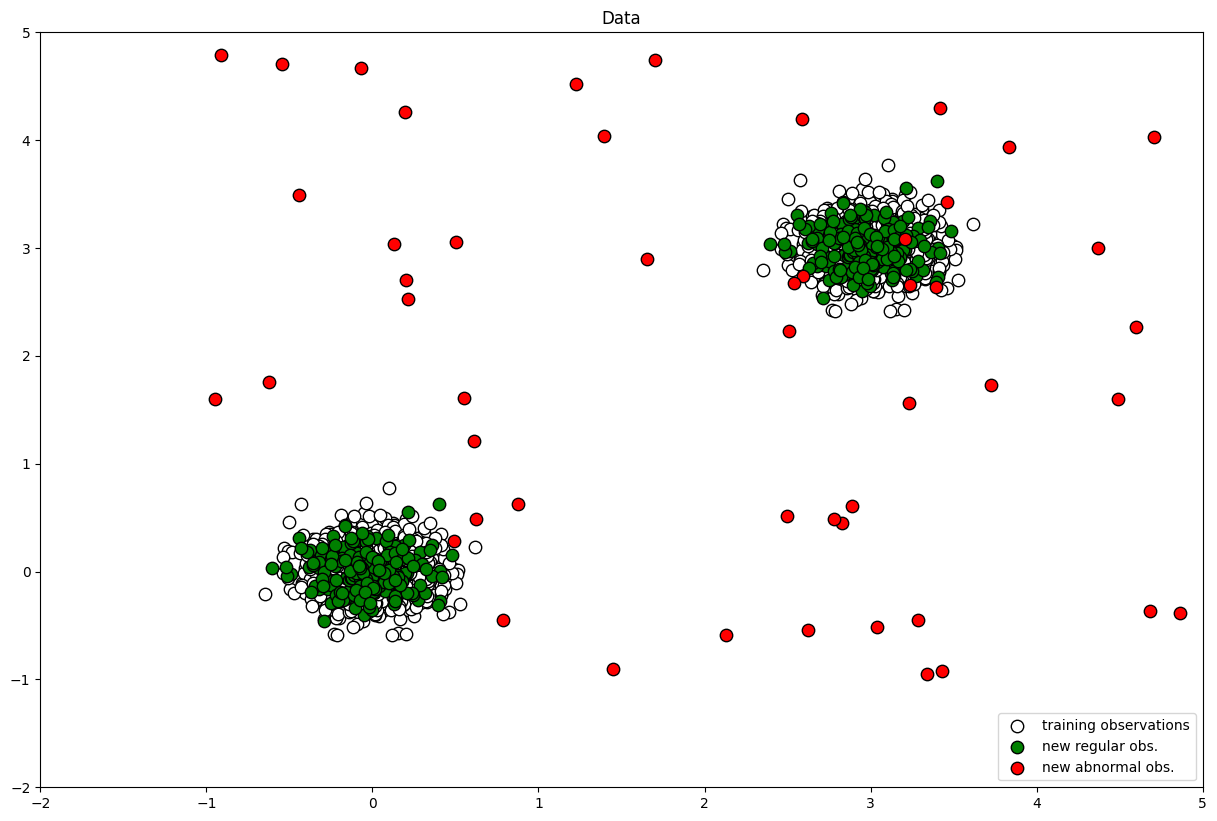

In [9]:
# Plotting generated data ----
plt.title("Data")

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*4, edgecolor='k')
p2 = plt.scatter(X_test.x1, X_test.x2, c='green',
                 s=20*4, edgecolor='k')
p3 = plt.scatter(X_outliers.x1, X_outliers.x2, c='red',
                s=20*4, edgecolor='k')

plt.axis('tight')
plt.xlim((-2, 5))
plt.ylim((-2, 5))
plt.legend([p1, p2, p3],
           ["training observations",
            "new regular obs.", "new abnormal obs."],
           loc="lower right")

# saving the figure
plt.savefig('generated_data.png', dpi=100)

In [11]:
# Isolation Forest ----
# training the model
clf = IsolationForest(max_samples=100, contamination = 0.1, random_state=rng)
clf.fit(X_train)

# predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [12]:
# new, 'normal' observations
print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])

Accuracy: 0.93


In [13]:
# outliers
print("Accuracy:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

Accuracy: 0.96


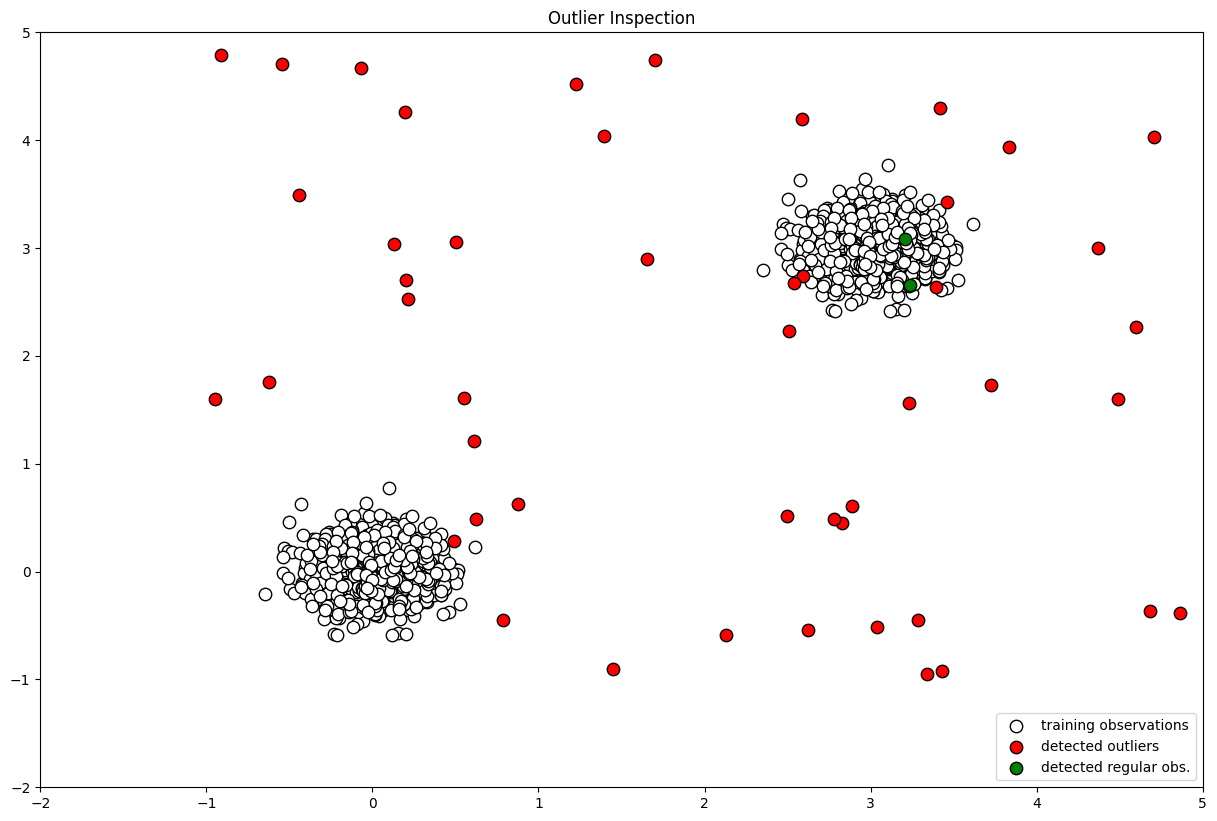

In [14]:
# Inspecting the outliers ----

# adding the predicted label
X_outliers = X_outliers.assign(y = y_pred_outliers)

plt.title("Outlier Inspection")

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*4, edgecolor='k')
p2 = plt.scatter(X_outliers.loc[X_outliers.y == -1, ['x1']], 
                 X_outliers.loc[X_outliers.y == -1, ['x2']], 
                 c='red', s=20*4, edgecolor='k')
p3 = plt.scatter(X_outliers.loc[X_outliers.y == 1, ['x1']], 
                 X_outliers.loc[X_outliers.y == 1, ['x2']], 
                 c='green', s=20*4, edgecolor='k')

plt.axis('tight')
plt.xlim((-2, 5))
plt.ylim((-2, 5))
plt.legend([p1, p2, p3],
           ["training observations",
            "detected outliers", 
            "detected regular obs."],
           loc="lower right")

# saving the figure
plt.savefig('outlier_inspection.png', dpi=100)

In [ ]:
iforest = create_model('iforest')

In [ ]:
print(iforest)

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=1,
    random_state=123, verbose=0)


We have created Isolation Forest model using `create_model()`. Notice the `contanimation` parameter is set `0.05` which is a default value when you donot pass `fraction` parameter in `create_model()`. `fraction` parameter determines the proportion of outliers in the dataset. In below example, we will create `One Class Support Vector Machine` model with `0.025` fraction.

In [ ]:
svm = create_model('svm', fraction = 0.025)

In [ ]:
print(svm)

OCSVM(cache_size=200, coef0=0.0, contamination=0.025, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)


Just be replacing `iforest` with `svm` inside `create_model()` we have now created `OCSVM` anomaly detection model. There are 12 models available ready-to-use in `pycaret.anomaly` module. To see the complete list, please see docstring. If you would like to read more about different models, their limitations and usecase, you may __[click here](https://pyod.readthedocs.io/en/latest/pyod.html)__ to read more about it.

## Assign a Model

Now that we have created a model, we would like to assign the anomaly labels to our dataset (1080 samples) to analyze the results. We will achieve this by using `assign_model()` function. See an example below:

In [ ]:
iforest_results = assign_model(iforest)
iforest_results.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,Label,Score
0,3501_12,0.344930,0.626194,0.383583,2.534561,4.097317,0.303547,0.222829,4.592769,0.239427,1.360164,0.339472,0.360164,0.333788,0.335380,0.926330,0.827876,1.839700,1.256708,0.459982,0.871305,0.298317,0.467030,0.219873,1.283765,2.598454,1.177126,0.287176,0.331060,0.793543,0.195771,0.512051,2.261255,0.815598,0.483856,0.503638,0.893815,0.732378,0.438154,0.720327,...,0.188809,0.880156,0.160182,1.521666,0.300325,0.642811,1.414053,0.339493,0.352115,0.201952,0.140664,0.187638,0.223943,0.327651,0.124528,0.182824,0.112687,0.676122,0.331685,1.510345,2.378920,0.192453,1.897202,0.962785,0.283409,0.150683,0.163175,0.140664,0.151464,0.455172,0.252700,0.218868,0.249187,1.139493,Ts65Dn,Memantine,S/C,t-SC-m,0,-0.014462
1,3520_5,0.630001,0.839187,0.357777,2.651229,4.261675,0.253184,0.185257,3.816673,0.204940,1.716583,0.825807,0.338737,0.403705,0.305030,0.881256,0.697285,1.691368,2.214460,0.561688,0.680690,0.598482,0.358163,0.182040,1.273125,2.754664,1.506497,0.258459,0.288820,0.837643,0.167246,0.416699,2.310305,0.324585,0.451692,0.408079,0.773061,0.510485,0.373086,0.628586,...,0.209459,1.134340,0.169316,2.388911,0.310546,0.683029,1.580882,0.274112,0.152557,0.171966,0.135334,0.166534,0.228140,0.263447,0.125729,0.235493,0.124735,0.569356,0.327636,1.964494,2.422032,0.151100,1.286831,1.022523,0.228736,0.151166,0.107909,0.135334,0.109897,0.496423,0.155008,0.153219,NaN,1.642886,Control,Memantine,C/S,c-CS-m,0,-0.070193
2,3414_13,0.555122,0.726229,0.278319,2.097249,2.897553,0.222222,0.174356,1.867880,0.203379,1.610136,0.686593,0.259692,0.306043,0.239116,0.680745,0.385532,1.213775,1.433398,0.454191,0.499025,0.617934,0.315789,0.187568,0.800520,1.991553,1.323587,0.248213,0.246047,0.736409,0.172623,0.412606,1.916613,0.316223,0.365389,0.285034,0.602339,0.176522,0.289149,0.268789,...,0.144503,0.800527,0.164417,1.922153,0.247202,0.319454,0.748190,0.143680,0.144997,0.156353,0.104839,0.144338,0.158492,0.184661,0.104016,0.195523,0.101876,0.435813,0.272383,1.195523,2.536537,0.140882,1.004773,0.936307,0.200790,0.152732,NaN,0.104839,NaN,0.344964,0.136109,0.155530,0.185484,1.657670,Ts65Dn,Memantine,C/S,t-CS-m,0,-0.070143
3,3488_8,0.275849,0.430764,0.285166,2.265254,3.250091,0.189258,0.157837,2.917611,0.202594,1.734746,0.321703,0.262148,0.262696,0.229083,0.763062,0.744428,1.607782,1.037998,0.378882,0.767994,0.245342,0.365181,0.155645,1.199854,2.045305,0.900804,0.214468,0.228718,0.580197,0.153453,0.350018,2.036536,1.012788,0.477347,0.513336,0.723054,0.540921,0.362258,0.630252,...,0.154218,0.813469,0.133884,0.986310,0.225388,0.268673,0.917556,0.108516,0.140125,0.151299,0.123415,0.148581,0.165895,0.163479,0.111033,0.236964,0.110630,0.526676,0.259211,1.226696,2.146165,0.164586,1.065331,0.704349,0.247332,0.142138,0.126636,0.123415,0.147373,0.390880,0.127944,0.207671,0.175357,0.893598,Control,Saline,S/C,c-SC-s,0,-0.080521
4,3501_7,0.304788,0.617299,0.335164,2.638236,4.876609,0.280590,0.199417,4.835421,0.236314,1.226532,0.309765,0.365711,0.336537,0.318689,0.902351,0.805389,1.845203,1.380470,0.438476,0.929810,0.270808,0.433499,0.190836,1.308907,2.981122,1.155140,0.265145,0.294148,0.801785,0.181397,0.466793,2.484984,0.765402,0.465076,0.458212,0.904925,0.689720,0.392826,0.672044,...,0.189124,1.029642,0.154055,1.403507,0.281599,0.565285,1.266361,0.366559,0.151759,0.182966,0.149567,0.181923,0.217096,0.301743,0.112619,0.205511,0.112097,0.624883,0.308736,1.577393,2.477299,0.183906

Notice that two columns `Label` and `Score` are added towards the end. 0 stands for inliers and 1 for outliers/anomalies. Score is the values computed by the algorithm. Outliers are assigned with larger anomaly scores. Notice that `iforest_results` also includes `MouseID` feature that we have dropped during `setup()`. It wasn't used for the model and is only appended to the dataset when you use `assign_model()`. In next section we will see how to analyze the results of anomaly detection using `plot_model()`. 

## Plot a Model

`plot_model()` function can be used to analyze the anomaly detection model over different aspects. This function takes a trained model object and returns a plot. See examples below:

#### T-distributed Stochastic Neighbor Embedding (t-SNE)

In [ ]:
plot_model(iforest)

#### Uniform Manifold Approximation and Projection

In [ ]:
plot_model(iforest, plot = 'umap')

## Predict on unseen data

`predict_model()` function is used to assign anomaly labels on the new unseen dataset. We will now use our `iforest` model to predict the data stored in `data_unseen`. This was created in the beginning of experiment and it contains 54 new samples that was not exposed to PyCaret before.

In [ ]:
unseen_predictions = predict_model(iforest, data=data_unseen)
unseen_predictions.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,Label,Score
0,3517_7,0.361782,0.565987,0.376145,2.774771,4.450250,0.262906,0.238968,6.041007,0.229808,1.697336,0.377394,0.348876,0.404038,0.301624,0.996045,0.713988,1.799958,1.879684,0.482515,0.791632,0.320358,0.429226,0.217735,1.164654,2.455454,1.262490,0.286844,0.299334,0.769359,0.213780,0.536844,2.560366,0.610325,0.575770,0.524979,0.880308,0.873855,0.549958,0.770816,...,0.175773,0.747058,0.150324,1.891271,0.232053,0.247469,1.253763,0.355651,0.209523,0.182888,0.104169,0.107908,0.159354,0.205509,0.121956,0.197482,0.135182,0.405728,0.269361,1.218736,1.771960,0.166560,1.281401,0.684302,0.205418,0.189729,0.169844,0.104169,0.141202,0.360485,0.208611,NaN,0.270820,0.782176,Ts65Dn,Saline,S/C,t-SC-s,1,0.001151
1,3517_8,0.329361,0.503216,0.326145,2.487893,3.925842,0.231177,0.195611,5.337306,0.210556,1.355846,0.335793,0.323118,0.356792,0.286984,0.913167,0.626182,1.576996,1.592698,0.440598,0.679342,0.274877,0.379304,0.185585,1.131290,2.169504,1.136020,0.243852,0.267121,0.698260,0.197692,0.481082,2.322361,0.543700,0.540673,0.499054,0.797957,0.730798,0.478434,0.682179,...,0.159624,0.712401,0.160823,1.929230,0.245710,0.306237,1.151781,0.364089,0.178908,0.175770,0.106477,0.148644,0.173187,0.203266,0.123270,0.192563,0.130282,0.358276,0.264071,1.218306,1.788153,0.146891,1.152611,0.707049,0.218675,0.205665,0.166820,0.106477,0.151689,0.391032,0.211478,NaN,0.255582,0.882451,Ts65Dn,Saline,S/C,t-SC-s,0,-0.061647
2,3517_9,0.328314,0.500465,0.363265,2.409370,3.796988,0.226250,0.187024,5.330917,0.203198,1.237591,0.323852,0.302287,0.350251,0.271240,0.852575,0.631716,1.566834,1.519799,0.454545,0.682469,0.273471,0.407325,0.184049,1.194832,2.116193,1.121584,0.233129,0.300428,0.641941,0.167317,0.479829,2.283696,0.553635,0.522402,0.511433,0.798476,0.649749,0.441718,0.620747,...,0.158997,0.682652,0.157521,1.888961,0.243291,0.358941,1.128562,0.373052,0.172277,0.168127,0.103200,0.139629,0.173937,0.205478,0.119155,0.211750,0.127824,0.419902,0.272895,1.276676,1.821636,0.139353,1.099603,0.721295,0.203265,0.161302,0.135664,0.103200,0.144148,0.394725,0.201974,NaN,0.241815,0.881029,Ts65Dn,Saline,S/C,t-SC-s,0,-0.073164
3,3517_10,0.377490,0.528331,0.379560,2.689263,3.978008,0.266753,0.229495,5.441138,0.227684,1.655369,0.393273,0.352911,0.399741,0.328590,0.996378,0.684088,1.715136,1.885899,0.494437,0.767141,0.326261,0.451229,0.211643,1.203881,2.211125,1.203105,0.287710,0.292109,0.689521,0.190944,0.567141,2.290298,0.598189,0.645796,0.583182,0.945149,0.916429,0.570763,0.776455,...,0.164865,0.699252,0.151681,1.863048,0.238864,0.201687,1.142654,0.354793,0.237558,0.176624,0.113196,0.136002,0.143723,0.197767,0.132795,0.154888,0.126856,0.393515,0.268203,1.165340,1.743794,0.157026,1.317140,0.689749,0.216653,0.219266,0.177218,0.113196,0.180663,0.388407,0.262620,NaN,0.262620,0.781328,Ts65Dn,Saline,S/C,t-SC-s,1,0.042799
4,3517_11,0.367813,0.478322,0.346371,2.356975,3.561499,0.252121,0.226437,4.868520,0.204288,1.403629,0.330113,0.320217,0.345193,0.286758,0.885014,0.616635,1.524034,1.614043,0.453817,0.680961,0.289821,0.379123,0.188737,1.058671,1.962064,1.107917,0.254006,0.261781,0.630537,0.178369,0.487512,2.082234,0.544769,0.580820,0.582234,0.846371,0.754713,0.481150,0.690386,...,0.155942,0.667160,0.169132,1.908531,0.247041,0.269970,1.035873,0.383136,0.189965,0.177638,0.109344,0.141765,0.158284,0.212155,0.131164,0.184788,0.124384,0.430597,0.285503,1.185528,1.798323,0.162229,1.201677,0.735577

`Label` column indicate the outlier (1 = outlier, 0 = inlier). `Score` is the values computed by the algorithm. Outliers are assigned with larger anomaly scores. You can also use `predict_model()` function to label the training data. See example below:

In [ ]:
data_predictions = predict_model(iforest, data = data)
data_predictions.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,Label,Score
0,3501_12,0.344930,0.626194,0.383583,2.534561,4.097317,0.303547,0.222829,4.592769,0.239427,1.360164,0.339472,0.360164,0.333788,0.335380,0.926330,0.827876,1.839700,1.256708,0.459982,0.871305,0.298317,0.467030,0.219873,1.283765,2.598454,1.177126,0.287176,0.331060,0.793543,0.195771,0.512051,2.261255,0.815598,0.483856,0.503638,0.893815,0.732378,0.438154,0.720327,...,0.188809,0.880156,0.160182,1.521666,0.300325,0.642811,1.414053,0.339493,0.352115,0.201952,0.140664,0.187638,0.223943,0.327651,0.124528,0.182824,0.112687,0.676122,0.331685,1.510345,2.378920,0.192453,1.897202,0.962785,0.283409,0.150683,0.163175,0.140664,0.151464,0.455172,0.252700,0.218868,0.249187,1.139493,Ts65Dn,Memantine,S/C,t-SC-m,0,-0.014462
1,3520_5,0.630001,0.839187,0.357777,2.651229,4.261675,0.253184,0.185257,3.816673,0.204940,1.716583,0.825807,0.338737,0.403705,0.305030,0.881256,0.697285,1.691368,2.214460,0.561688,0.680690,0.598482,0.358163,0.182040,1.273125,2.754664,1.506497,0.258459,0.288820,0.837643,0.167246,0.416699,2.310305,0.324585,0.451692,0.408079,0.773061,0.510485,0.373086,0.628586,...,0.209459,1.134340,0.169316,2.388911,0.310546,0.683029,1.580882,0.274112,0.152557,0.171966,0.135334,0.166534,0.228140,0.263447,0.125729,0.235493,0.124735,0.569356,0.327636,1.964494,2.422032,0.151100,1.286831,1.022523,0.228736,0.151166,0.107909,0.135334,0.109897,0.496423,0.155008,0.153219,NaN,1.642886,Control,Memantine,C/S,c-CS-m,0,-0.070193
2,3414_13,0.555122,0.726229,0.278319,2.097249,2.897553,0.222222,0.174356,1.867880,0.203379,1.610136,0.686593,0.259692,0.306043,0.239116,0.680745,0.385532,1.213775,1.433398,0.454191,0.499025,0.617934,0.315789,0.187568,0.800520,1.991553,1.323587,0.248213,0.246047,0.736409,0.172623,0.412606,1.916613,0.316223,0.365389,0.285034,0.602339,0.176522,0.289149,0.268789,...,0.144503,0.800527,0.164417,1.922153,0.247202,0.319454,0.748190,0.143680,0.144997,0.156353,0.104839,0.144338,0.158492,0.184661,0.104016,0.195523,0.101876,0.435813,0.272383,1.195523,2.536537,0.140882,1.004773,0.936307,0.200790,0.152732,NaN,0.104839,NaN,0.344964,0.136109,0.155530,0.185484,1.657670,Ts65Dn,Memantine,C/S,t-CS-m,0,-0.070143
3,3488_8,0.275849,0.430764,0.285166,2.265254,3.250091,0.189258,0.157837,2.917611,0.202594,1.734746,0.321703,0.262148,0.262696,0.229083,0.763062,0.744428,1.607782,1.037998,0.378882,0.767994,0.245342,0.365181,0.155645,1.199854,2.045305,0.900804,0.214468,0.228718,0.580197,0.153453,0.350018,2.036536,1.012788,0.477347,0.513336,0.723054,0.540921,0.362258,0.630252,...,0.154218,0.813469,0.133884,0.986310,0.225388,0.268673,0.917556,0.108516,0.140125,0.151299,0.123415,0.148581,0.165895,0.163479,0.111033,0.236964,0.110630,0.526676,0.259211,1.226696,2.146165,0.164586,1.065331,0.704349,0.247332,0.142138,0.126636,0.123415,0.147373,0.390880,0.127944,0.207671,0.175357,0.893598,Control,Saline,S/C,c-SC-s,0,-0.080521
4,3501_7,0.304788,0.617299,0.335164,2.638236,4.876609,0.280590,0.199417,4.835421,0.236314,1.226532,0.309765,0.365711,0.336537,0.318689,0.902351,0.805389,1.845203,1.380470,0.438476,0.929810,0.270808,0.433499,0.190836,1.308907,2.981122,1.155140,0.265145,0.294148,0.801785,0.181397,0.466793,2.484984,0.765402,0.465076,0.458212,0.904925,0.689720,0.392826,0.672044,...,0.189124,1.029642,0.154055,1.403507,0.281599,0.565285,1.266361,0.366559,0.151759,0.182966,0.149567,0.181923,0.217096,0.301743,0.112619,0.205511,0.112097,0.624883,0.308736,1.577393,2.477299,0.183906

## Saving the model

We have now finished the experiment by using our `iforest` model to predict outlier labels on unseen data. This brings us to the end our experiment but one question is still to be asked. What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is No, you don't need to rerun the entire experiment and reconstruct the pipeline to generate predictions on new data. PyCaret inbuilt function `save_model()` allows you to save the model along with entire transformation pipeline for later use.

In [ ]:
save_model(iforest,'Final_IForest_Model_fav_2020')

Transformation Pipeline and Model Succesfully Saved


## Loading the saved model

To load a saved model on a future date in the same or different environment, we would use the PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction

In [ ]:
saved_iforest = load_model('Final_IForest_Model_fav_2020')

Transformation Pipeline and Model Successfully Loaded


Once the model is loaded in the environment, you can simply use it to predict on any new data using the same `predict_model()` function . Below we have applied the loaded model to predict the same `data_unseen` that we have used in section 10 above.

In [ ]:
new_prediction = predict_model(saved_iforest, data=data_unseen)

In [ ]:
new_prediction.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class,Label,Score
0,3517_7,0.361782,0.565987,0.376145,2.774771,4.450250,0.262906,0.238968,6.041007,0.229808,1.697336,0.377394,0.348876,0.404038,0.301624,0.996045,0.713988,1.799958,1.879684,0.482515,0.791632,0.320358,0.429226,0.217735,1.164654,2.455454,1.262490,0.286844,0.299334,0.769359,0.213780,0.536844,2.560366,0.610325,0.575770,0.524979,0.880308,0.873855,0.549958,0.770816,...,0.175773,0.747058,0.150324,1.891271,0.232053,0.247469,1.253763,0.355651,0.209523,0.182888,0.104169,0.107908,0.159354,0.205509,0.121956,0.197482,0.135182,0.405728,0.269361,1.218736,1.771960,0.166560,1.281401,0.684302,0.205418,0.189729,0.169844,0.104169,0.141202,0.360485,0.208611,NaN,0.270820,0.782176,Ts65Dn,Saline,S/C,t-SC-s,1,0.001151
1,3517_8,0.329361,0.503216,0.326145,2.487893,3.925842,0.231177,0.195611,5.337306,0.210556,1.355846,0.335793,0.323118,0.356792,0.286984,0.913167,0.626182,1.576996,1.592698,0.440598,0.679342,0.274877,0.379304,0.185585,1.131290,2.169504,1.136020,0.243852,0.267121,0.698260,0.197692,0.481082,2.322361,0.543700,0.540673,0.499054,0.797957,0.730798,0.478434,0.682179,...,0.159624,0.712401,0.160823,1.929230,0.245710,0.306237,1.151781,0.364089,0.178908,0.175770,0.106477,0.148644,0.173187,0.203266,0.123270,0.192563,0.130282,0.358276,0.264071,1.218306,1.788153,0.146891,1.152611,0.707049,0.218675,0.205665,0.166820,0.106477,0.151689,0.391032,0.211478,NaN,0.255582,0.882451,Ts65Dn,Saline,S/C,t-SC-s,0,-0.061647
2,3517_9,0.328314,0.500465,0.363265,2.409370,3.796988,0.226250,0.187024,5.330917,0.203198,1.237591,0.323852,0.302287,0.350251,0.271240,0.852575,0.631716,1.566834,1.519799,0.454545,0.682469,0.273471,0.407325,0.184049,1.194832,2.116193,1.121584,0.233129,0.300428,0.641941,0.167317,0.479829,2.283696,0.553635,0.522402,0.511433,0.798476,0.649749,0.441718,0.620747,...,0.158997,0.682652,0.157521,1.888961,0.243291,0.358941,1.128562,0.373052,0.172277,0.168127,0.103200,0.139629,0.173937,0.205478,0.119155,0.211750,0.127824,0.419902,0.272895,1.276676,1.821636,0.139353,1.099603,0.721295,0.203265,0.161302,0.135664,0.103200,0.144148,0.394725,0.201974,NaN,0.241815,0.881029,Ts65Dn,Saline,S/C,t-SC-s,0,-0.073164
3,3517_10,0.377490,0.528331,0.379560,2.689263,3.978008,0.266753,0.229495,5.441138,0.227684,1.655369,0.393273,0.352911,0.399741,0.328590,0.996378,0.684088,1.715136,1.885899,0.494437,0.767141,0.326261,0.451229,0.211643,1.203881,2.211125,1.203105,0.287710,0.292109,0.689521,0.190944,0.567141,2.290298,0.598189,0.645796,0.583182,0.945149,0.916429,0.570763,0.776455,...,0.164865,0.699252,0.151681,1.863048,0.238864,0.201687,1.142654,0.354793,0.237558,0.176624,0.113196,0.136002,0.143723,0.197767,0.132795,0.154888,0.126856,0.393515,0.268203,1.165340,1.743794,0.157026,1.317140,0.689749,0.216653,0.219266,0.177218,0.113196,0.180663,0.388407,0.262620,NaN,0.262620,0.781328,Ts65Dn,Saline,S/C,t-SC-s,1,0.042799
4,3517_11,0.367813,0.478322,0.346371,2.356975,3.561499,0.252121,0.226437,4.868520,0.204288,1.403629,0.330113,0.320217,0.345193,0.286758,0.885014,0.616635,1.524034,1.614043,0.453817,0.680961,0.289821,0.379123,0.188737,1.058671,1.962064,1.107917,0.254006,0.261781,0.630537,0.178369,0.487512,2.082234,0.544769,0.580820,0.582234,0.846371,0.754713,0.481150,0.690386,...,0.155942,0.667160,0.169132,1.908531,0.247041,0.269970,1.035873,0.383136,0.189965,0.177638,0.109344,0.141765,0.158284,0.212155,0.131164,0.184788,0.124384,0.430597,0.285503,1.185528,1.798323,0.162229,1.201677,0.735577

Notice that results of `unseen_predictions` and `new_prediction` are identical.